# Chi-Square Test of Independence

The Chi-Square test of independence is used to determine if there is a significant relationship between two categorical (nominal) variables. It means the Chi-Square Test of Independence is a hypothesis testing test with 2 hypotheses present; the Null Hypothesis and the Alternative Hypothesis. The hypothesis is written below.

- Null Hypothesis (H0): There is no relationship between the variables

- Alternative Hypothesis (H1): There is a relationship between variables

As an example, I would work with a loan dataset from Kaggle for classification problems. Here, the dataset including various numerical, ordinal and nominal variables as stated below (for article purposes, I would drop all the Null values which actually need another analysis).

In [1]:
import pandas as pd

In [2]:
loan = pd.read_csv('loan_data_set.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Dropping the uninformative feature
loan.drop(columns=['Loan_ID'], inplace=True)

#Transform the numerical feature into categorical feature
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].astype('object')
loan['Credit_History'] = loan['Credit_History'].astype('object')

#Dropping all the null value
loan.dropna(inplace=True)

#Getting all the categorical columns except the target
categorical_columns = loan.select_dtypes(exclude='number').drop(columns=['Loan_Status'], axis=1).columns
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    object 
 9   Credit_History     480 non-null    object 
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 48.8+ KB


In [5]:
categorical_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In the Chi-Square test, we display the data in a cross-tabulation (contingency) format with each row representing a level (group) for one variable and each column representing a level (group) for another variable. Let’s try to create a cross-tabulation table between Gender and Loan_Status columns.

In [6]:
pd.crosstab(loan['Gender'], loan['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


Now, let’s try to use the Chi-Square test of independence to test the relationship between these 2 features. Luckily python library scipy already contains the test function for us to use.

In [7]:
# Import the function
from scipy.stats import chi2_contingency

In [8]:
#Testing the relationship
chi_res = chi2_contingency(pd.crosstab(loan['Loan_Status'], loan['Gender']))

In [9]:
chi_res

(1.6495637942018446,
 0.19901831142812107,
 1,
 array([[ 26.51666667, 121.48333333],
        [ 59.48333333, 272.51666667]]))

In [10]:
print(f"Chi2 Statistic: {chi_res[0]}, p-value: {chi_res[1]}")

Chi2 Statistic: 1.6495637942018446, p-value: 0.19901831142812107


If we choose our p-value level to 0.05, as the p-value test result is more than 0.05 we fail to reject the Null Hypothesis. This means, there is no relationship between the Gender and Loan_Status feature based on the Chi-Square test of independence.

We could try to use this test with all the categorical features present.

In [11]:
chi2_check = []
for col in categorical_columns:
    if chi2_contingency(pd.crosstab(loan["Loan_Status"], loan[col]))[1] < 0.05:
        chi2_check.append("Reject Null Hypothesis")
    else:
        chi2_check.append("Fail to Reject Null Hypothesis")

In [12]:
res = pd.DataFrame(data=[categorical_columns, chi2_check]).T
res.columns = ['Column', 'Hypothesis']
res

,Column,Hypothesis
0,Gender,Fail to Reject Null Hypothesis
1,Married,Reject Null Hypothesis
2,Dependents,Fail to Reject Null Hypothesis
3,Education,Fail to Reject Null Hypothesis
4,Self_Employed,Fail to Reject Null Hypothesis
5,Loan_Amount_Term,Reject Null Hypothesis
6,Credit_History,Reject Null Hypothesis
7,Property_Area,Reject Null Hypothesis


# Post Hoc Testing

The Chi-square test of independence is an omnibus test which means it tests the data as a whole. If we have multiple classes within a category, we would not be able to easily tell which class of the features are responsible for the relationship if the Chi-square table is larger than 2×2. To pinpoint which class is responsible, we need a post hoc test.

To conduct multiple 2×2 Chi-square test of independence, we need to regroup the features for each test to where it is one category class against the rest. To do this, we could apply OneHotEncoding to each class and create a new cross-tab table against the other feature.

For example, let’s try to do a post hoc test to the Property_Area feature. First, we need to done OneHotEncoding to the Property_Area feature.

In [13]:
property_dummies = pd.get_dummies(data=loan[['Property_Area', 'Loan_Status']], columns=['Property_Area'])

In [14]:
property_dummies

,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,N,1,0,0
2,Y,0,0,1
3,Y,0,0,1
4,Y,0,0,1
5,Y,0,0,1
...,...,...,...,...
609,Y,1,0,0
610,Y,1,0,0
611,Y,0,0,1
612,Y,0,0,1


Next, we create the cross-tab table for each of the Property_Area class against the target Loan_Status.

In [15]:
#Example
pd.crosstab(property_dummies['Loan_Status'], property_dummies['Property_Area_Rural'])

Property_Area_Rural,0,1
Loan_Status,,
N,94,54
Y,247,85


We then could do a Chi-Square test of independence to this pair.

In [16]:
chi_res = chi2_contingency(
    pd.crosstab(
        property_dummies['Loan_Status'], property_dummies['Property_Area_Rural']
    )
)
print(f"Chi2 Statistic: {chi_res[0]}, p-value: {chi_res[1]}")

Chi2 Statistic: 5.377420967206426, p-value: 0.02039901197579578


However, there is something to remember. Comparing multiple classes against each other would means that the error rate of a false positive compound with each test. For example, if we choose our first test at p-value level 0.05 means there is a 5% chance of a false positive; if we have multiple classes, the test after that would compounding the error with the chance become 10% of a false positive, and so forth. With each subsequent test, the error rate would increase by 5%. In our case above, we had 3 pairwise comparisons. This means that our Chi-square test would have an error rate of 15%. Meaning our p-value being tested at would equal 0.15, which is quite high.

In this case, we could use the Bonferroni-adjusted method for correcting the p-value we use. We adjust our P-value by the number of pairwise comparisons we want to do. The formula is p/N, where p= the p-value of the original test and N= the number of planned pairwise comparisons. For example, in our case, above we have 3 class within the Property_Area feature; which means we would have 3 pairwise comparisons if we test all the class against the Loan_Status feature. Our P-value would be 0.05/3 = 0.0167

Using the adjusted P-value, we could test all the previously significant result to see which class are responsible for creating a significant relationship.

In [17]:
check = {}
for i in res[res["Hypothesis"] == "Reject Null Hypothesis"]["Column"]:
    dummies = pd.get_dummies(loan[i])
    bon_p_value = 0.05/loan[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(loan["Loan_Status"], dummies[series]))[1] < bon_p_value:
            check[f"{i}-{series}"] = "Reject Null Hypothesis"
        else:
            check[f"{i}-{series}"] = "Fail to Reject Null Hypothesis"
res_chi_ph = pd.DataFrame(data=[check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

C:\Users\johnw\AppData\Local\Temp\ipykernel_20096\2593683747.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(loan[i])
C:\Users\johnw\AppData\Local\Temp\ipykernel_20096\2593683747.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(loan[i])


,Pair,Hypothesis
0,Married-No,Reject Null Hypothesis
1,Married-Yes,Reject Null Hypothesis
2,Loan_Amount_Term-36.0,Fail to Reject Null Hypothesis
3,Loan_Amount_Term-60.0,Fail to Reject Null Hypothesis
4,Loan_Amount_Term-84.0,Fail to Reject Null Hypothesis
5,Loan_Amount_Term-120.0,Fail to Reject Null Hypothesis
6,Loan_Amount_Term-180.0,Fail to Reject Null Hypothesis
7,Loan_Amount_Term-240.0,Fail to Reject Null Hypothesis
8,Loan_Amount_Term-300.0,Fail to Reject Null Hypothesis
9,Loan_Amount_Term-360.0,Fail to Reject Null Hypothesis


Here I also include the binary feature for pairwise comparison. As we can see, many of the classes are not actually significant. Even the Loan_Amount_Term that previously significant before the post hoc test resulted in all the classes are not significant.

# Prediction Model

The aim of this feature selection technique is to see how it impact our prediction model. Let’s use the simplest model; Logistic Regression as a benchmark. First, I would use all the data and see the model performance in the initial phase. Here, I treat all the categorical data as nominal (even the ordinal data).

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc, accuracy_score
import matplotlib.pyplot as plt

In [19]:
# OneHotEncoding all the categorical variable except the target; 
# Also drop_first = True to avoid multicollinearity for Logistic Regression
data_log = pd.get_dummies(
    data=loan, 
    columns=loan.select_dtypes(exclude="number").drop(columns=["Loan_Status"], axis=1).columns, 
    drop_first=True
)

C:\Users\johnw\AppData\Local\Temp\ipykernel_20096\3331144648.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_log = pd.get_dummies(


In [20]:
# Change the class into numerical value
data_log['Loan_Status'] = data_log['Loan_Status'].apply(lambda x: 0 if x == 'N' else 1)

In [21]:
# Splitting the data into Training and Test data
X_train, X_test, y_train, y_test = train_test_split(
    data_log.drop(columns=["Loan_Status"], axis=1),
    data_log['Loan_Status'],
    test_size=0.30,
    random_state=101
)

In [22]:
# Creating the prediction model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
#Performance Check
predictions = log_model.predict(X_test)

In [24]:
accuracy_score(y_test, predictions)

0.7708333333333334

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.34      0.48        44
           1       0.77      0.96      0.85       100

    accuracy                           0.77       144
   macro avg       0.78      0.65      0.66       144
weighted avg       0.77      0.77      0.74       144



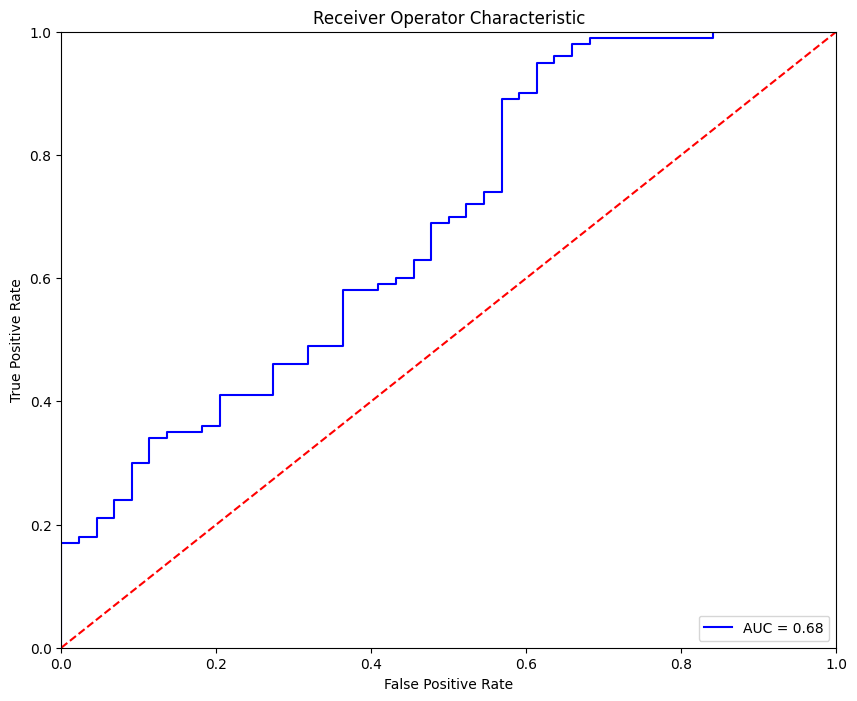

In [26]:
# Creating the ROC-AUC plot
preds = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, "b", label=f"AUC = {round(roc_auc, 2)}")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Above is the model performance if we use all the data, let’s compare it with the data we selecting via the Chi-Square Test of Independence.

In [27]:
# Get the list of all the significant pairwise
significant_chi = []
for i in res_chi_ph[res_chi_ph["Hypothesis"] == "Reject Null Hypothesis"]["Pair"]:
    significant_chi.append(f"{i.split('-')[0]}_{i.split('-')[1]}")

In [28]:
significant_chi

['Married_No',
 'Married_Yes',
 'Credit_History_0.0',
 'Credit_History_1.0',
 'Property_Area_Semiurban']

In [29]:
# Drop the data with duplicate information
for i in ['Married_No', 'Credit_History_0.0']:
    significant_chi.remove(i)

In [30]:
# Including the numerical data, as I have not analyze any of this feature
for i in loan.select_dtypes('number').columns:
    significant_chi.append(i)

In [31]:
significant_chi

['Married_Yes',
 'Credit_History_1.0',
 'Property_Area_Semiurban',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount']

Previously, if we use all the data as it is we would end up with 21 independent variables. With feature selection, we only have 6 features to work with. I would not do the train test splitting once more because I want to test the data with the same training data and test data. Let’s see how our model performance is with these selected features.

In [32]:
# Training the model only with the significant features and the numerical features
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train[significant_chi], y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Metrics check
predictions = log_model.predict(X_test[significant_chi])

In [34]:
accuracy_score(y_test, predictions)

0.7847222222222222

In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.34      0.49        44
           1       0.77      0.98      0.86       100

    accuracy                           0.78       144
   macro avg       0.83      0.66      0.68       144
weighted avg       0.81      0.78      0.75       144



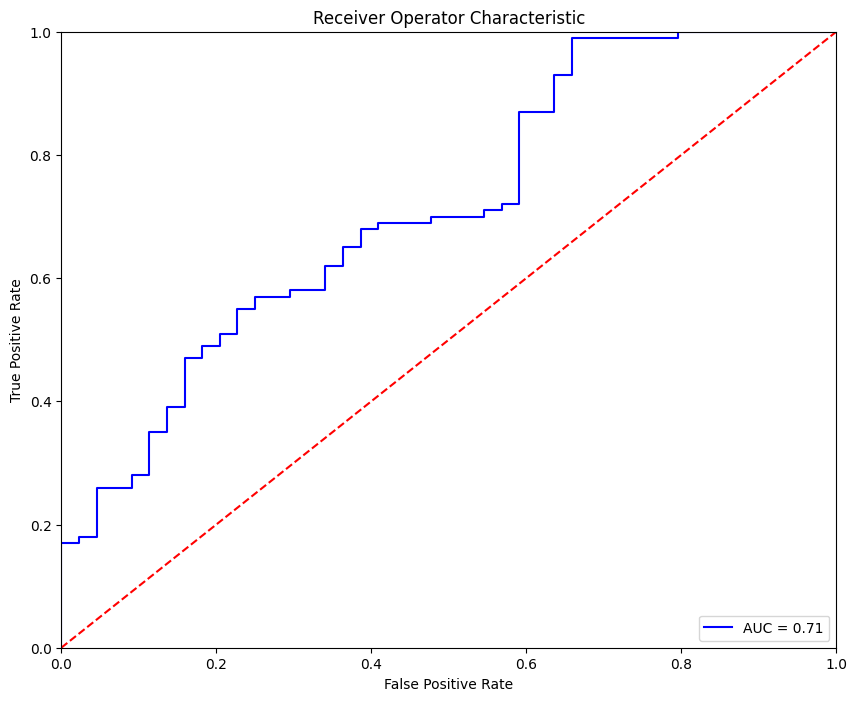

In [36]:
# Creating the ROC-AUC plot
preds = log_model.predict_proba(X_test[significant_chi])[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, "b", label=f"AUC = {round(roc_auc, 2)}")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# Conclusion

Metrics wise, the model with selected features is doing slightly better than the one trained with all the features. Theoretically speaking, it could happen because we eliminate all the noise in the data and only end up with the most important pattern. Although, we have not yet analyzed the numerical data which could also be important. Overall, I have shown that with the Chi-Square test of independence we could end up only with the most important categorical features.